# Understanding Hired Rides in NYC

_[Project prompt](https://docs.google.com/document/d/1VERPjEZcC1XSs4-02aM-DbkNr_yaJVbFjLJxaYQswqA/edit#)_

_This scaffolding notebook may be used to help setup your final project. It's **totally optional** whether you make use of this or not._

_If you do use this notebook, everything provided is optional as well - you may remove or add prose and code as you wish._

_Anything in italics (prose) or comments (in code) is meant to provide you with guidance. **Remove the italic lines and provided comments** before submitting the project, if you choose to use this scaffolding. We don't need the guidance when grading._

_**All code below should be consider "pseudo-code" - not functional by itself, and only a suggestion at the approach.**_

## Requirements

_A checklist of requirements to keep you on track. Remove this whole cell before submitting the project._

* Code clarity: make sure the code conforms to:
    * [ ] [PEP 8](https://peps.python.org/pep-0008/) - You might find [this resource](https://realpython.com/python-pep8/) helpful as well as [this](https://github.com/dnanhkhoa/nb_black) or [this](https://jupyterlab-code-formatter.readthedocs.io/en/latest/) tool
    * [ ] [PEP 257](https://peps.python.org/pep-0257/)
    * [ ] Break each task down into logical functions
* The following files are submitted for the project (see the project's GDoc for more details):
    * [ ] `README.md`
    * [ ] `requirements.txt`
    * [ ] `.gitignore`
    * [ ] `schema.sql`
    * [ ] 6 query files (using the `.sql` extension), appropriately named for the purpose of the query
    * [x] Jupyter Notebook containing the project (this file!)
* [x] You can edit this cell and add a `x` inside the `[ ]` like this task to denote a completed task

## Project Setup

In [1]:
# import libraries

from math import radians, sin, cos, sqrt, atan2

# import os
import requests
import bs4
import re
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy as db

In [5]:
# notebook formatting

%load_ext nb_black

<IPython.core.display.Javascript object>

In [6]:
# any constants you might need, for example:

TAXI_URL = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
# add other constants to refer to any local data, e.g. uber & weather
UBER_CSV = "uber_rides_sample.csv"

NEW_YORK_BOX_COORDS = ((40.560445, -74.242330), (40.908524, -73.717047))

DATABASE_URL = "sqlite:///project.db"
DATABASE_SCHEMA_FILE = "schema.sql"
QUERY_DIRECTORY = "queries"

<IPython.core.display.Javascript object>

## Part 1: Data Preprocessing

_A checklist of requirements to keep you on track. Remove this whole cell before submitting the project. The order of these tasks aren't necessarily the order in which they need to be done. It's okay to do them in an order that makes sense to you._

* [ ] Define a function that calculates the distance between two coordinates in kilometers that **only uses the `math` module** from the standard library.
* [ ] Taxi data:
    * [ ] Use the `re` module, and the packages `requests`, BeautifulSoup (`bs4`), and (optionally) `pandas` to programmatically download the required CSV files & load into memory.
    * You may need to do this one file at a time - download, clean, sample. You can cache the sampling by saving it as a CSV file (and thereby freeing up memory on your computer) before moving onto the next file. 
* [ ] Weather & Uber data:
    * [ ] Download the data manually in the link provided in the project doc.
* [ ] All data:
    * [ ] Load the data using `pandas`
    * [ ] Clean the data, including:
        * Remove unnecessary columns
        * Remove invalid data points (take a moment to consider what's invalid)
        * Normalize column names
        * (Taxi & Uber data) Remove trips that start and/or end outside the designated [coordinate box](http://bboxfinder.com/#40.560445,-74.242330,40.908524,-73.717047)
    * [ ] (Taxi data) Sample the data so that you have roughly the same amount of data points over the given date range for both Taxi data and Uber data.
* [ ] Weather data:
    * [ ] Split into two `pandas` DataFrames: one for required hourly data, and one for the required daily daya.
    * [ ] You may find that the weather data you need later on does not exist at the frequency needed (daily vs hourly). You may calculate/generate samples from one to populate the other. Just document what you’re doing so we can follow along. 

    """Summary line.

    Extended description of function.

    Args:
        arg1 (int): Description of arg1
        arg2 (str): Description of arg2

    Returns:
        bool: Description of return value

    """

### Calculating distance
_**TODO:** Write some prose that tells the reader what you're about to do here._

In [15]:
def calculate_distance(from_coord, to_coord):
    """Caculate the distance between two coordinates

    Args:
        from_coord (tuple): A pair values (float) of latitude and longitude
        to_coord (tuple): A pair values (float) of latitude and longitude

    Returns:
        float: the distance

    """
    
    # convert degrees to radians
    lat1, lon1 = radians(from_coord[0]), radians(from_coord[1])
    lat2, lon2 = radians(to_coord[0]), radians(to_coord[1])

    # apply Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    r = 6373.0  # radius of earth (km)

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = r * c

    return distance

<IPython.core.display.Javascript object>

In [14]:
calculate_distance(NEW_YORK_BOX_COORDS[0], NEW_YORK_BOX_COORDS[1])

58.8135468911925

<IPython.core.display.Javascript object>

In [ ]:
def add_distance_column(dataframe):
    raise NotImplemented()

### Processing Taxi Data

_**TODO:** Write some prose that tells the reader what you're about to do here._

In [10]:
def find_taxi_parquet_urls():
    """Retrieve the yellow taxi parquet urls.

    The function retrieves the url from January 2009 through June 2015.

    Args:
        None

    Returns:
        list: Desired urls as list of strings

    """

    # Use requests library to get TAXI_URL html
    response = requests.get(TAXI_URL)
    html = response.content

    # Use BeautifulSoup to get all yellow taxi parquet urls
    soup = bs4.BeautifulSoup(html, "html.parser")
    yellow_a_tags = soup.find_all("a", attrs={"title": "Yellow Taxi Trip Records"})
    yellow_taxi_urls = [a["href"] for a in yellow_a_tags]

    # Use re moduel to filter the urls
    pattern = re.compile(
        r"yellow_tripdata_20(09-(?:0\d|1[0-2])|1[0-4]-(?:0\d|1[0-2])|15-0[1-6]).parquet"
    )

    yellow_taxi_urls_desired = []

    for link in yellow_taxi_urls:
        match = pattern.search(link)
        if match:
            yellow_taxi_urls_desired.append(match.string)

    return yellow_taxi_urls_desired

<IPython.core.display.Javascript object>

In [11]:
# find_taxi_parquet_urls()

<IPython.core.display.Javascript object>

In [12]:
def download_taxi_data(taxi_parquet_url):
    for url in taxi_parquet_url:

        response = requests.get(url, stream=True)
        file_name = url.split("/")[-1]
        # file_path = os.getcwd() + '/datasets/yellow_taxi_data/'

        with open(file_name, "wb") as f:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)

<IPython.core.display.Javascript object>

In [13]:
# Download the taxi parquet files to the current folder

taxi_parquet_url = find_taxi_parquet_urls()
download_taxi_data(taxi_parquet_url)

<IPython.core.display.Javascript object>

In [49]:
test = pd.read_parquet("yellow_tripdata_2014-12.parquet")
columns_needed1 = [
    "Trip_Pickup_DateTime",
    "Trip_Dropoff_DateTime",
    "Start_Lon",
    "Start_Lat",
    "End_Lon",
    "End_Lat",
    "Tip_Amt",
]

columns_needed2 = [
    "tpep_pickup_datetime",
    "tpep_dropoff_datetime",
    "PULocationID",
    "DOLocationID",
    "tip_amount",
]

columns_needed3 = [
    "pickup_datetime",
    "dropoff_datetime",
    "pickup_longitude",
    "pickup_latitude",
    "dropoff_longitude",
    "dropoff_latitude",
    "tip_amount",
]

test.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

<IPython.core.display.Javascript object>

In [31]:
test.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2010-09-15 06:52:00,2010-09-15 06:56:00,1,0.39,-73.981725,40.763627,1,None,-73.975280,40.761040,CSH,3.7,0.0,0.5,0.0,0.00,4.20
1,VTS,2010-09-13 10:21:00,2010-09-13 10:34:00,1,1.48,-73.981770,40.745295,1,None,-73.992273,40.764130,CSH,8.1,0.0,0.5,0.0,0.00,8.60
2,VTS,2010-09-13 11:50:00,2010-09-13 11:59:00,1,1.37,-73.974165,40.750150,1,None,-73.948047,40.781815,CSH,6.9,0.0,0.5,0.0,0.00,7.40
3,VTS,2010-09-13 13:35:00,2010-09-13 14:07:00,1,11.11,-73.985448,40.717913,1,None,-74.015868,40.714947,CSH,27.3,0.0,0.5,0.0,4.57,32.37
4,VTS,2010-09-13 14:54:00,2010-09-13 15:13:00,3,3.52,-73.979482,40.746463,1,None,-73.967770,40.760060,CSH,12.5,0.0,0.5,0.0,0.00,13.00


<IPython.core.display.Javascript object>

In [134]:
gdf = geopandas.read_file("taxi_zones/taxi_zones.shp").to_crs(4326)


def convert_locationId(locationId, gdf):

    geo_row = gdf.loc[gdf["LocationID"] == locationId]
    lon = geo_row["geometry"].centroid.x.tolist()[0]
    lat = geo_row["geometry"].centroid.y.tolist()[0]

    return lon, lat


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((-73.90175 40.76077, -73.90147 40.759..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


<IPython.core.display.Javascript object>

In [137]:
# Test convert_locationId
# geo_row = gdf.loc[gdf["LocationID"] == 10]
# geo_row["geometry"]
x, y = convert_locationId(11, gdf)
x
# x.tolist()[0]

# row["geometry"]
# df = pd.DataFrame()
# df["lon"] = x
# df["lat"] = y
# df

/var/folders/f2/c459b0lj7334qjj2s0crtt440000gn/T/ipykernel_19135/3346334721.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lon = geo_row["geometry"].centroid.x.tolist()[0]
/var/folders/f2/c459b0lj7334qjj2s0crtt440000gn/T/ipykernel_19135/3346334721.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lat = geo_row["geometry"].centroid.y.tolist()[0]


-74.00748823642046

<IPython.core.display.Javascript object>

In [29]:
def get_and_clean_month_taxi_data(url):
    response = requests.get(url, stream=True)
    file_name = url.split("/")[-1]

    with open(file_name, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
                
    df = pd.read_parquet(file_name)
    
    


# find_taxi_parquet_urls()[0]
# get_and_clean_month_taxi_data(find_taxi_parquet_urls()[0])

<IPython.core.display.Javascript object>

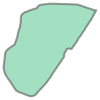

<IPython.core.display.Javascript object>

In [133]:
# Test geopandas pacakge

gdf = geopandas.read_file("taxi_zones/taxi_zones.shp").to_crs(4326)
lon = gdf["geometry"][0].centroid.x
lat = gdf["geometry"][0].centroid.y

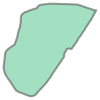

<IPython.core.display.Javascript object>

In [78]:
geo_row = gdf.loc[gdf["LocationID"] == 1]
geo_row["geometry"][0]

In [69]:
def get_and_clean_taxi_data():
    all_taxi_dataframes = []

    all_csv_urls = find_taxi_csv_urls()
    for csv_url in all_csv_url:
        # maybe: first try to see if you've downloaded this exact
        # file already and saved it before trying again
        dataframe = get_and_clean_month_taxi_data(csv_url)
        add_distance_column(dataframe)
        # maybe: if the file hasn't been saved, save it so you can
        # avoid re-downloading it if you re-run the function

        all_taxi_dataframes.append(dataframe)

    # create one gigantic dataframe with data from every month needed
    taxi_data = pd.contact(all_taxi_dataframes)
    return taxi_data

<IPython.core.display.Javascript object>

### Processing Uber Data

_**TODO:** Write some prose that tells the reader what you're about to do here._

In [10]:
def load_and_clean_uber_data(csv_file):
    raise NotImplemented()

In [ ]:
def get_uber_data():
    uber_dataframe = load_and_clean_uber_data(UBER_DATA)
    add_distance_column(uber_dataframe)
    return uber_dataframe

### Processing Weather Data

_**TODO:** Write some prose that tells the reader what you're about to do here._

In [11]:
def clean_month_weather_data_hourly(csv_file):
    raise NotImplemented()

In [ ]:
def clean_month_weather_data_daily(csv_file):
    raise NotImplemented()

In [ ]:
def load_and_clean_weather_data():
    hourly_dataframes = []
    daily_dataframes = []
    
    # add some way to find all weather CSV files
    # or just add the name/paths manually
    weather_csv_files = ["TODO"]
    
    for csv_file in weather_csv_files:
        hourly_dataframe = clean_month_weather_data_hourly(csv_file)
        daily_dataframe = clean_month_weather_data_daily(csv_file)
        hourly_dataframes.append(hourly_dataframe)
        daily_dataframes.append(daily_dataframe)
        
    # create two dataframes with hourly & daily data from every month
    hourly_data = pd.concat(hourly_dataframes)
    daily_data = pd.concat(daily_dataframes)
    
    return hourly_data, daily_data

### Process All Data

_This is where you can actually execute all the required functions._

_**TODO:** Write some prose that tells the reader what you're about to do here._

In [ ]:
taxi_data = get_and_clean_taxi_data()
uber_data = get_uber_data()
hourly_weather_data, daily_weather_data = load_and_clean_weather_data()

## Part 2: Storing Cleaned Data

_Write some prose that tells the reader what you're about to do here._

In [14]:
engine = db.create_engine(DATABASE_URL)

In [15]:
# if using SQL (as opposed to SQLAlchemy), define the commands 
# to create your 4 tables/dataframes
HOURLY_WEATHER_SCHEMA = """
TODO
"""

DAILY_WEATHER_SCHEMA = """
TODO
"""

TAXI_TRIPS_SCHEMA = """
TODO
"""

UBER_TRIPS_SCHEMA = """
TODO
"""

In [ ]:
# create that required schema.sql file
with open(DATABASE_SCHEMA_FILE, "w") as f:
    f.write(HOURLY_WEATHER_SCHEMA)
    f.write(DAILY_WEATHER_SCHEMA)
    f.write(TAXI_TRIPS_SCHEMA)
    f.write(UBER_TRIPS_SCHEMA)

In [16]:
# create the tables with the schema files
with engine.connect() as connection:
    pass

### Add Data to Database

_**TODO:** Write some prose that tells the reader what you're about to do here._

In [17]:
def write_dataframes_to_table(table_to_df_dict):
    raise NotImplemented()

In [ ]:
map_table_name_to_dataframe = {
    "taxi_trips": taxi_data,
    "uber_trips": uber_data,
    "hourly_weather": hourly_data,
    "daily_weather": daily_data,
}

In [ ]:
write_dataframes_to_table(map_table_name_to_dataframe)

## Part 3: Understanding the Data

_A checklist of requirements to keep you on track. Remove this whole cell before submitting the project. The order of these tasks aren't necessarily the order in which they need to be done. It's okay to do them in an order that makes sense to you._

* [ ] For 01-2009 through 06-2015, what hour of the day was the most popular to take a yellow taxi? The result should have 24 bins.
* [ ] For the same time frame, what day of the week was the most popular to take an uber? The result should have 7 bins.
* [ ] What is the 95% percentile of distance traveled for all hired trips during July 2013?
* [ ] What were the top 10 days with the highest number of hired rides for 2009, and what was the average distance for each day?
* [ ] Which 10 days in 2014 were the windiest, and how many hired trips were made on those days?
* [ ] During Hurricane Sandy in NYC (Oct 29-30, 2012) and the week leading up to it, how many trips were taken each hour, and for each hour, how much precipitation did NYC receive and what was the sustained wind speed?

In [18]:
def write_query_to_file(query, outfile):
    raise NotImplemented()

### Query N

_**TODO:** Write some prose that tells the reader what you're about to do here._

_Repeat for each query_

In [ ]:
QUERY_N = """
TODO
"""

In [ ]:
engine.execute(QUERY_N).fetchall()

In [ ]:
write_query_to_file(QUERY_N, "some_descriptive_name.sql")

## Part 4: Visualizing the Data

_A checklist of requirements to keep you on track. Remove this whole cell before submitting the project. The order of these tasks aren't necessarily the order in which they need to be done. It's okay to do them in an order that makes sense to you._

* [ ] Create an appropriate visualization for the first query/question in part 3
* [ ] Create a visualization that shows the average distance traveled per month (regardless of year - so group by each month). Include the 90% confidence interval around the mean in the visualization
* [ ] Define three lat/long coordinate boxes around the three major New York airports: LGA, JFK, and EWR (you can use bboxfinder to help). Create a visualization that compares what day of the week was most popular for drop offs for each airport.
* [ ] Create a heatmap of all hired trips over a map of the area. Consider using KeplerGL or another library that helps generate geospatial visualizations.
* [ ] Create a scatter plot that compares tip amount versus distance.
* [ ] Create another scatter plot that compares tip amount versus precipitation amount.

_Be sure these cells are executed so that the visualizations are rendered when the notebook is submitted._

### Visualization N

_**TODO:** Write some prose that tells the reader what you're about to do here._

_Repeat for each visualization._

_The example below makes use of the `matplotlib` library. There are other libraries, including `pandas` built-in plotting library, kepler for geospatial data representation, `seaborn`, and others._

In [19]:
# use a more descriptive name for your function
def plot_visual_n(dataframe):
    figure, axes = plt.subplots(figsize=(20, 10))
    
    values = "..."  # use the dataframe to pull out values needed to plot
    
    # you may want to use matplotlib to plot your visualizations;
    # there are also many other plot types (other 
    # than axes.plot) you can use
    axes.plot(values, "...")
    # there are other methods to use to label your axes, to style 
    # and set up axes labels, etc
    axes.set_title("Some Descriptive Title")
    
    plt.show()

In [ ]:
def get_data_for_visual_n():
    # Query SQL database for the data needed.
    # You can put the data queried into a pandas dataframe, if you wish
    raise NotImplemented()

In [ ]:
some_dataframe = get_data_for_visual_n()
plot_visual_n(some_dataframe)